In [1]:
import pymc as pm
N = 100
p = pm.Uniform("freq_cheating", 0, 1) #カンニングの割合

In [2]:
true_answers = pm.Bernoulli("truths", p, size=N) #真実

In [3]:
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

In [4]:
print(second_coin_flips.value)

[False  True  True False  True False  True  True  True  True False False
 False  True  True  True False False False  True  True  True False  True
  True  True False False  True False  True  True False False  True False
 False  True  True False False  True  True False False False  True  True
 False False False False  True  True  True False  True False  True  True
  True  True  True  True  True False False  True False  True  True False
  True False  True  True  True False  True  True  True False False  True
  True False  True False  True  True False  True  True False  True False
  True False False  True]


In [5]:
@pm.deterministic
def observed_proportion(t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips):
    observed = fc * t_a + (1-fc)*sc
    return observed.sum()/float(N)

In [6]:
print(observed_proportion.value)

0.47


In [7]:
X = 35
observations = pm.Binomial("obs", N, observed_proportion, observed=True, value=X)

In [8]:
model = pm.Model([p, true_answers, first_coin_flips, second_coin_flips, observed_proportion, observations])

#以下は3章で
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 8.7 sec

Populating the interactive namespace from numpy and matplotlib


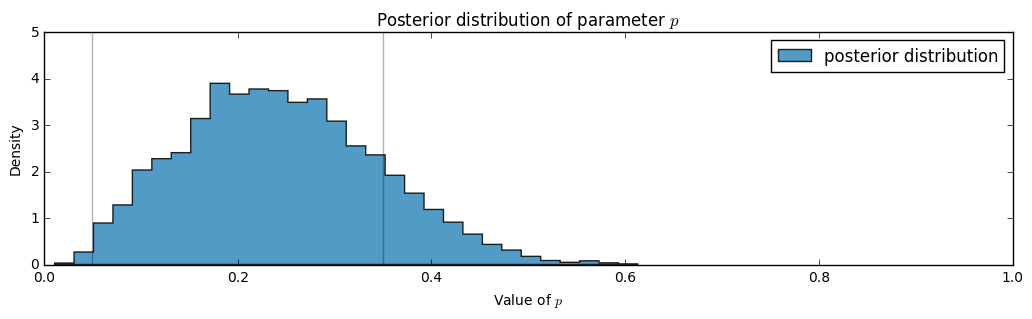

In [9]:
%pylab inline
figsize(12.5, 3)

p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", 
         normed=True, alpha=0.85, bins=30, color="#348ABD",
         label="posterior distribution")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)

plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend()

In [10]:
# もうひとつの方法

In [11]:
p = pm.Uniform("freq_cheating", 0, 1) #カンニングの割合

@pm.deterministic
def p_skewed(p=p):
    return 0.5 * p + 0.25

In [12]:
yes_responses = pm.Binomial("number_cheaters", 100, p_skewed, value=35, observed=True)

model = pm.Model([yes_responses, p_skewed, p])

#以下は３章で
mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)

 [-----------------100%-----------------] 25000 of 25000 complete in 1.2 sec

Populating the interactive namespace from numpy and matplotlib


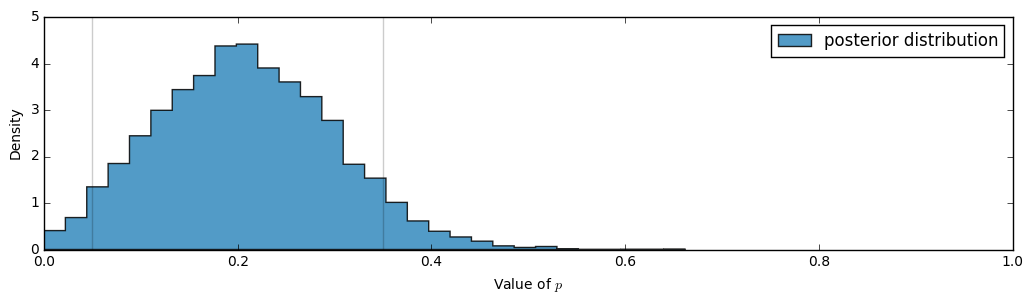

In [13]:
%pylab inline
figsize(12.5, 3)

p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled",
        normed=True, alpha=0.85, bins=30, color="#348ABD",
        label="posterior distribution") # 事後分布
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.2)

plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.legend()